# PJ Diabetes indicators analysis.

## Olga Yurlova
### Course "Data Science in Medicine"

In [1466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1467]:
def null_percent_col(dataset):
    '''Percentage of null values in columns'''
    for col in dataset.columns:
        zero_percent = (dataset[col] == 0).mean() * 100
        print(f'{col} : {zero_percent:.2f}%')
    return

In [1468]:
def isna_percent_col(dataset):
    '''Percent of missing values'''
    for col in dataset.columns:
        na_percent = dataset[col].isna().mean() * 100
        print(f'{col} : {na_percent:.2f}%')
    return

In [1469]:
def drop_na_row_col_percent(dataset, percent: float):
    '''Drop data with missing values less than %'''
    for col in dataset.columns:
        zero_percent = (dataset[col] == 0).mean() * 100
        print(zero_percent)
        if zero_percent >= percent:
            dataset = dataset[dataset[col] != 0]
    return

In [1470]:
def fill_na_median(dataset, col: str):
    '''Fill the missing values with median'''
    dataset[col].fillna(dataset[col].median(), inplace=True)
    return

In [1471]:
def fill_na_mode(dataset, col: str):
    '''Fill the missing values with median'''
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    return

In [1472]:
def data_concat(dataset1,dataset2):
    '''Two datasets concatenation'''
    dataset1['set'] = "dataset1"
    dataset2['set'] = "dataset2"
    data_concat = pd.concat([dataset1, dataset2])
    data_concat=data_concat.drop(['set'], axis=1) #drop 'set' as not neccesary any more
    return data_concat

In [1473]:
def del_columns(dataset, cols: list):
    '''Delete columns from dataset'''
    return dataset.drop(columns=cols)

In [1474]:
def col_name_change(dataset, old_col: str, new_col: str):
    '''Change column name'''
    dataset.rename(columns={old_col: new_col}, inplace=True)
    return dataset

In [1475]:
def add_col(dataset, col_name: str, value):
    '''Add a new column with value'''
    dataset[col_name] = value
    return

In [1476]:
def corr_matrix(dataset, title: str): 
    '''The correlation matrix of features and lable in a dataset'''
    plt.figure(figsize = [20, 15])
    plt.subplot(3, 3, 1)
    corr=dataset.corr()
    sns.heatmap(corr,annot=True,fmt='0.2f',linewidth=0.5)
    plt.title(title)
    plt.show()
    return

In [1477]:
def data_displot(dataset, col: str, hue: str, title: str): 
    '''The distribution via displot'''
    plt.figure(figsize = [20, 15])
    sns.displot(data = dataset, kde=True, x = dataset[col], hue=hue, palette=palette)
    plt.title(title)
    plt.plot()
    plt.show()
    return

In [1478]:
def data_boxplot(dataset, col1: str, col2: str, title: str):
    '''The distribution via boxplot'''
    plt.figure(figsize = [20, 15])
    plt.subplot(3, 3, 1)
    sns.boxplot(data = dataset, y = dataset[col1], x = dataset[col2], dodge=True, palette=palette)
    plt.title(title)
    plt.plot()
    plt.show()
    return

In [1479]:
def data_violinplot(dataset, col1: str, col2: str, title: str):
    '''The distribution via violinplot'''
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 3, 1)
    sns.violinplot(x=col1, y=col2, data=dataset)
    plt.title(title)
    plt.show()
    return

In [1480]:
def data_regplot(dataset, col1: str, col2: str, col3: str, title: str):
    '''The distribution via regplot'''
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 3, 1)
    sns.regplot(x=col1, y=col2, data=original_diabetes_copy[original_diabetes_copy[col3] == 0], color='blue') 
    sns.regplot(x=col1, y=col2, data=original_diabetes_copy[original_diabetes_copy[col3] == 1], color='red')
    plt.title(title)
    plt.show()
    return

In [1481]:
def data_lmplot(dataset, col1: str, col2: str, col3: str, title: str):
    '''The distribution via lmplot'''
    plt.figure(figsize=(20, 10))
    sns.lmplot(data=dataset,x=col1,y=col2,hue=col3,x_bins=1000,fit_reg=False)
    plt.title(title)
    plt.show()
    return

In [1482]:
def data_pie_plot_labels(dataset, col: str, labels: list, title: str):
    '''The distribution via pie plot'''
    dataset[col].value_counts().plot.pie(labels=labels)
    plt.title(title)
    plt.show()
    return

In [1483]:
def age_ranges_bins_labels(dataset, col1: str, col2: str, bins: int, labels: list):
    dataset[col2]=pd.cut(dataset[col1], bins , labels = labels)
    return 

### Load data

#### Dataset 1. Diabetes

In [1484]:
original_diabetes=pd.read_csv("diabetes.csv")
original_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The diabetes dataset is part of a larger dataset, and it includes data just about females at least 21 years old of Pima Indian heritage.\
The feature "Outcome" is a prediction based on diagnostic measurements whether a patient has diabetes (1, 0 if not).
It includes 768 records and 9 attributes.

In [1485]:
# Data info
original_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Columns describtion:

    Pregnancies:              Number of times pregnant
    Glucose:                  Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure:            Diastolic blood pressure (mm Hg)
    SkinThickness:            Triceps skin fold thickness (mm)
    Insulin:                  2-Hour serum insulin (mu U/ml)
    BMI:                      Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age:                      Age (years)
    Outcome:                  Predicted diebetes (0 or 1)


In [1486]:
# Data describtion
original_diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data preprocessing

In [1487]:
# Checking for missing value
original_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1488]:
# Check duplicate rows
original_diabetes.duplicated().sum()

0

In [1489]:
# Check for null values
(original_diabetes == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [1490]:
null_percent_col(original_diabetes)

Pregnancies : 14.45%
Glucose : 0.65%
BloodPressure : 4.56%
SkinThickness : 29.56%
Insulin : 48.70%
BMI : 1.43%
DiabetesPedigreeFunction : 0.00%
Age : 0.00%
Outcome : 65.10%


The Diabetes dataset does not have missing and duplicated values.

Columns, which could content missing or incorrect data:\
Glucose - The minimum value is 0 which is not possible.\
BloodPressure - The blood pressure of 0 is not possible.\
SkinThickness - The skin thickness of 0 is not possible.\
Insulin -  The insulin level of 0 is not possible.\
BMI -  The body mass index (BMI) of 0 is not possible.

In [1491]:
# create copy of original_diabetes for data preprocessing
original_diabetes_copy = original_diabetes.copy()

The columns 'Glucose', 'BloodPressure', 'BMI' have less than 5% null values. So then it is acceptable to delete incorrect data.

In [1492]:
original_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin'
                        ,'BMI']] = original_diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin'
                                                           ,'BMI']].replace(0,np.NaN)


In [1493]:
drop_na_row_col_percent(original_diabetes_copy,5)

14.453125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
64.9923896499239


In [1494]:
(original_diabetes_copy == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Other incorrect data will be replaced with median values. 

In [1495]:
fill_na_median(original_diabetes_copy,'SkinThickness')
fill_na_median(original_diabetes_copy,'Insulin')
original_diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Data analysis

In [1496]:
# set the general graphics attributes
palette = {0: 'blue', 1: 'red'} # blue for 'not having diabetes' and red for 'having diabetes'

##### Search for correlation between database features

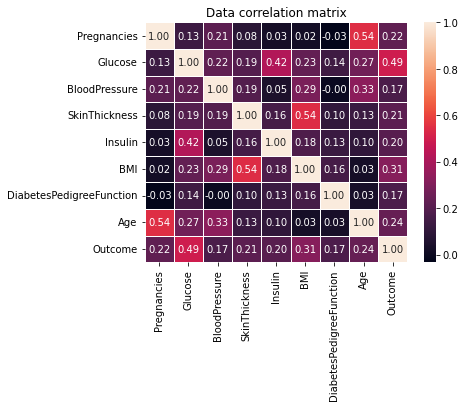

In [1497]:
# Check data correlation
corr_matrix(original_diabetes_copy,'Data correlation matrix')

#### Conclusion: There is a significant correlation between glucose levels, increased body mass index, age on the one hand and diagnosed diabetes. At the same time the indicator of blood pressure can be useful for the PJ purpose.

<Figure size 1440x1080 with 0 Axes>

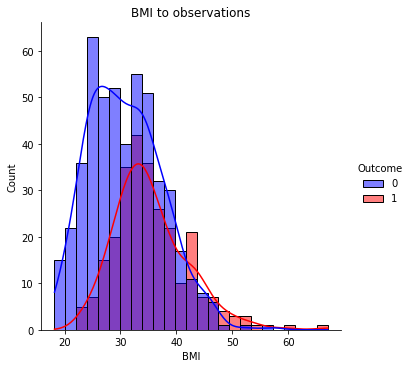

In [1498]:
# The distribution of BMI via displot
data_displot(original_diabetes_copy,'BMI','Outcome','BMI to observations')

Distribution of BMI demonstrates that the inflexion point is about 33 for the diagnosed diabetes, in range BMI 30-45 people have  a higher probability of getting diabetes.

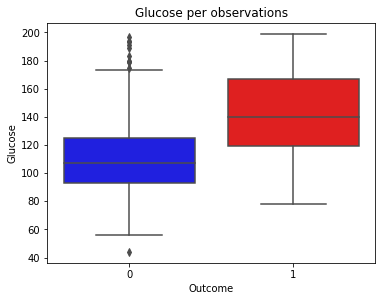

In [1499]:
# The distribution Glucose via boxplot
data_boxplot(original_diabetes_copy, 'Glucose', 'Outcome', 'Glucose per observations')

The boxplot proves a significant impact of the glucose level on the positive diagnosis.

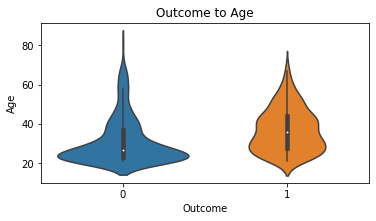

In [1500]:
# Age distribution to the Outcome in a violin plot
data_violinplot(original_diabetes_copy, 'Outcome', 'Age', 'Outcome to Age')

The correlation of diabetes and age shows a period of life when diabetes can be diagnosed with higher probability

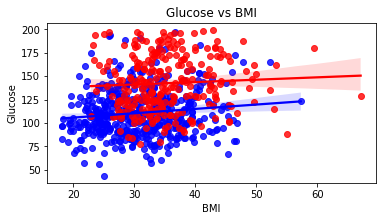

In [1501]:
#Estimate a correlation between the two most significant features: Glucose and BMI
data_regplot(original_diabetes_copy, 'BMI', 'Glucose', 'Outcome', 'Glucose vs BMI')


#### Conclusion: 2 features - Glucose and BMI - are the most significant indicators having connection to the diabetes.

#### Preprocessing before merge with Dataset 2.

In [1502]:
# Change column's names
col_name_change(original_diabetes_copy, 'Outcome', 'diabetes')
col_name_change(original_diabetes_copy, 'Glucose', 'glucose')
col_name_change(original_diabetes_copy, 'Age', 'age')
col_name_change(original_diabetes_copy, 'BloodPressure', 'diaBP')

,Pregnancies,glucose,diaBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [1503]:
# add new column 'sex' with value 'F'
add_col(original_diabetes_copy,'sex','F')
original_diabetes_copy.head()

,Pregnancies,glucose,diaBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,diabetes,sex
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,F
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,F
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,F
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,F
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,F


### Dataset 2. Cardiovascular Study Dataset

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes 3390 records and 15 attributes.

In [1504]:
original_train=pd.read_csv("train.csv")
original_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [1505]:
original_test=pd.read_csv("test.csv")
original_test.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [1506]:
original_train=original_train.drop(['id'], axis=1) #drop 'id' like irrelevant feature
original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [1507]:
original_test=original_test.drop(['id'], axis=1) #drop 'id' like irrelevant feature
original_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              848 non-null    int64  
 1   education        830 non-null    float64
 2   sex              848 non-null    object 
 3   is_smoking       848 non-null    object 
 4   cigsPerDay       841 non-null    float64
 5   BPMeds           839 non-null    float64
 6   prevalentStroke  848 non-null    int64  
 7   prevalentHyp     848 non-null    int64  
 8   diabetes         848 non-null    int64  
 9   totChol          836 non-null    float64
 10  sysBP            848 non-null    float64
 11  diaBP            848 non-null    float64
 12  BMI              843 non-null    float64
 13  heartRate        848 non-null    float64
 14  glucose          764 non-null    float64
dtypes: float64(9), int64(4), object(2)
memory usage: 99.5+ KB


Datasets look like they were split to test and train from the original dataset for Machine Learning purposes.
   It is meaningful to concatenate the test and train datasets back to get more data.

In [1508]:
# Concatenation of train and test datasets
df_prep = data_concat(original_test,original_train)
df_prep=df_prep.drop(['TenYearCHD'], axis=1) #drop 'TenYearCHD' as irrelevant for PJ
df_prep.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [1509]:
# Data info
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4238 non-null   int64  
 1   education        4133 non-null   float64
 2   sex              4238 non-null   object 
 3   is_smoking       4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
dtypes: float64(9), int64(4), object(2)
memory usage: 529.8+ KB


#### Data describtion:
 
Sex:      male or female("M" or "F")\
Age:      Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)\
is_smoking:   whether or not the patient is a current smoker ("YES" or "NO")\
Cigs Per Day: the number of cigarettes that the person smoked on average in one day\
BP Meds:  whether or not the patient was on blood pressure medication (Nominal)\
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)\
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)\
Diabetes: whether or not the patient had diabetes (Nominal)\
Tot Chol: total cholesterol level (Continuous)\
Sys BP:   systolic blood pressure (Continuous)\
Dia BP:   diastolic blood pressure (Continuous)\
BMI:      Body Mass Index (Continuous)\
Heart Rate: heart rate\
Glucose: glucose level (Continuous)\
Predicted 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)\

In [1510]:
# Data describtion
df_prep.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4133.000000,4238,4238,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2419,2144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.584946,1.978950,NaN,NaN,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,1.019791,NaN,NaN,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000


In [1511]:
# Checking for missing value
isna_percent_col(df_prep)

age : 0.00%
education : 2.48%
sex : 0.00%
is_smoking : 0.00%
cigsPerDay : 0.68%
BPMeds : 1.25%
prevalentStroke : 0.00%
prevalentHyp : 0.00%
diabetes : 0.00%
totChol : 1.18%
sysBP : 0.00%
diaBP : 0.00%
BMI : 0.45%
heartRate : 0.02%
glucose : 9.16%


The columns "education" and "glucose" have the most missing values. We need to check the statistics of these columns.
   While the remaining missing values can be replaced with the median.

In [1512]:
# create copy of df_prep for data cleaning
df_copy = df_prep.copy()

In [1513]:
# Because the mean and median of "glucose" are nearby, take the median of values
fill_na_median(df_copy,'glucose')

In [1514]:
# Because values of "education" are integers from 1 to 4, take mode of values
fill_na_mode(df_copy,'education')

In [1515]:
# fill the remaining missing values by median
fill_na_median(df_copy,'BPMeds')
fill_na_median(df_copy,'totChol')
fill_na_median(df_copy,'cigsPerDay')
fill_na_median(df_copy,'BMI')
fill_na_median(df_copy,'heartRate')

In [1516]:
# Checking for missing value
isna_percent_col(df_copy)

age : 0.00%
education : 0.00%
sex : 0.00%
is_smoking : 0.00%
cigsPerDay : 0.00%
BPMeds : 0.00%
prevalentStroke : 0.00%
prevalentHyp : 0.00%
diabetes : 0.00%
totChol : 0.00%
sysBP : 0.00%
diaBP : 0.00%
BMI : 0.00%
heartRate : 0.00%
glucose : 0.00%


In [1517]:
# Check duplicated rows
df_copy.duplicated().sum()

0

In [1518]:
# Check for null values
(df_copy == 0).sum()

age                   0
education             0
sex                   0
is_smoking            0
cigsPerDay         2173
BPMeds             4114
prevalentStroke    4213
prevalentHyp       2922
diabetes           4129
totChol               0
sysBP                 0
diaBP                 0
BMI                   0
heartRate             0
glucose               0
dtype: int64

In [1519]:
null_percent_col(df_copy)

age : 0.00%
education : 0.00%
sex : 0.00%
is_smoking : 0.00%
cigsPerDay : 51.27%
BPMeds : 97.07%
prevalentStroke : 99.41%
prevalentHyp : 68.95%
diabetes : 97.43%
totChol : 0.00%
sysBP : 0.00%
diaBP : 0.00%
BMI : 0.00%
heartRate : 0.00%
glucose : 0.00%


#### Data analysis

##### Search for correlation between database features

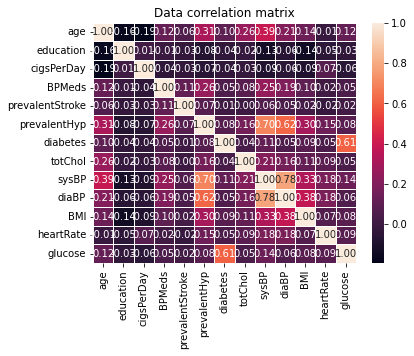

In [1520]:
# Check data correlation
corr_matrix(df_copy,'Data correlation matrix')

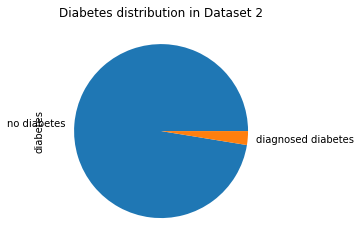

In [1521]:
# Diebetes distribution on pie plot
diabetes_list = ['no diabetes','diagnosed diabetes']
data_pie_plot_labels(df_copy, 'diabetes', diabetes_list,'Diabetes distribution in Dataset 2')

#### Conclusion: Dataset 2 is not very informative regarding the diabetes indicators - the strong direct correlation between hight glucose level and diabetes can be observed only, which is clear.

### Merge of Dataset 1 and Dataset 2 for the data analysis purpose.

In [1522]:
original_diabetes_copy.head()

,Pregnancies,glucose,diaBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,age,diabetes,sex
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,F
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,F
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,F
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,F
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,F


In [1523]:
df_copy.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,78.0
3,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,78.0


Dataset 1 and Dataset 2 have the identical columns data: 'age','sex','diaBP','BMI','glucose' and 'diabetes'. Merging is performed according to the specified columns.

In [1524]:
cols = ['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction']
df_1 = del_columns(original_diabetes_copy,cols)
df_1.head()

,glucose,diaBP,BMI,age,diabetes,sex
0,148.0,72.0,33.6,50,1,F
1,85.0,66.0,26.6,31,0,F
2,183.0,64.0,23.3,32,1,F
3,89.0,66.0,28.1,21,0,F
4,137.0,40.0,43.1,33,1,F


In [1525]:
cols = ['is_smoking','education','cigsPerDay','BPMeds','prevalentHyp','prevalentStroke','totChol','sysBP','heartRate']
df_2 = del_columns(df_copy,cols)
df_2.head()

,age,sex,diabetes,diaBP,BMI,glucose
0,43,M,0,65.0,24.42,100.0
1,56,F,0,82.5,28.61,58.0
2,58,F,0,100.0,25.56,78.0
3,47,F,0,66.0,23.40,78.0
4,44,M,0,87.0,25.81,78.0


In [1526]:
# Concatenation of Dataset 1 and Dataset 2
df_1_2 = data_concat(df_1,df_2)
df_1_2.head()

,glucose,diaBP,BMI,age,diabetes,sex
0,148.0,72.0,33.6,50,1,F
1,85.0,66.0,26.6,31,0,F
2,183.0,64.0,23.3,32,1,F
3,89.0,66.0,28.1,21,0,F
4,137.0,40.0,43.1,33,1,F


In [1527]:
df_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 3389
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   glucose   5001 non-null   float64
 1   diaBP     4971 non-null   float64
 2   BMI       4995 non-null   float64
 3   age       5006 non-null   int64  
 4   diabetes  5006 non-null   int64  
 5   sex       5006 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 273.8+ KB


#### Data analysis

##### Search for correlation between database features

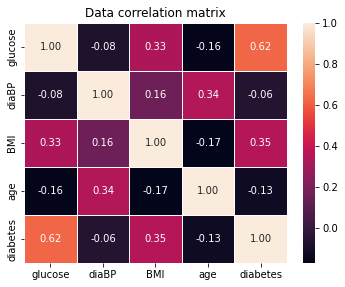

In [1528]:
# Check data correlation
corr_matrix(df_1_2,'Data correlation matrix')

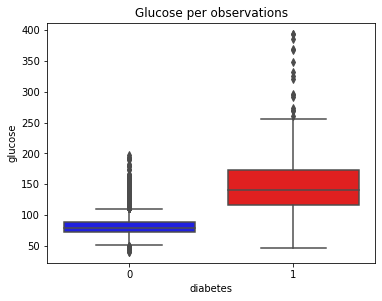

In [1529]:
# The distribution Glucose via boxplot
data_boxplot(df_1_2, 'glucose', 'diabetes', 'Glucose per observations')

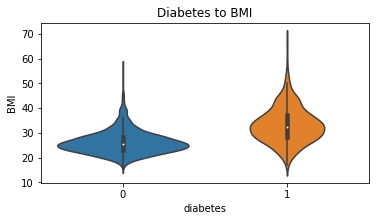

In [1530]:
# BMI distribution to the Diebetes in a violin plot
data_violinplot(df_1_2, 'diabetes', 'BMI', 'Diabetes to BMI')

<Figure size 1440x720 with 0 Axes>

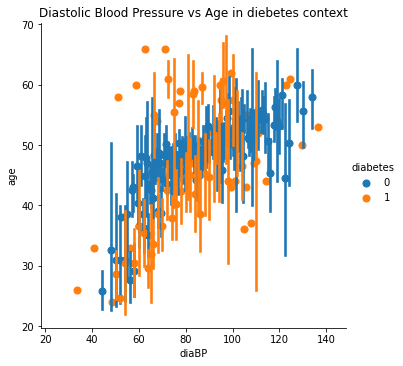

In [1531]:
# Diastolic blood pressure vs age distribution in diebetes context
data_lmplot(df_1_2, 'diaBP', 'age', 'diabetes', 'Diastolic Blood Pressure vs Age in diebetes context')

#### Conclusion: The significant correlation between the elevated glucose levels and increased body mass index and diagnosed diabetes is confirmed. Hight blood pressure is strongly correlated with age but it is not very clear concerning the diagnosed diabetes.

### Dataset 3. Diabetes Health Indicators Dataset

The Dataset 3 is a result of the health-related telephone survey that is collected annually from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. The dataset diabetes_binary_5050split_health_indicators_BRFSS2015.csv was selected for the PJ purposes because it has 21 feature variables and is balanced.

In [1532]:
original_diabetes_binary=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
original_diabetes_binary.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [1533]:
original_diabetes_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

#### Data describtion:
There are folowing columns wich can be used for the PJ purposes:\
Diabetes_binary\
HighBP\
BMI\
Sex\
Age

In [1534]:
# Data describtion
original_diabetes_binary.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [1535]:
# Checking for missing value
isna_percent_col(original_diabetes_binary)

Diabetes_binary : 0.00%
HighBP : 0.00%
HighChol : 0.00%
CholCheck : 0.00%
BMI : 0.00%
Smoker : 0.00%
Stroke : 0.00%
HeartDiseaseorAttack : 0.00%
PhysActivity : 0.00%
Fruits : 0.00%
Veggies : 0.00%
HvyAlcoholConsump : 0.00%
AnyHealthcare : 0.00%
NoDocbcCost : 0.00%
GenHlth : 0.00%
MentHlth : 0.00%
PhysHlth : 0.00%
DiffWalk : 0.00%
Sex : 0.00%
Age : 0.00%
Education : 0.00%
Income : 0.00%


In [1536]:
# Check duplicated rows
original_diabetes_binary.duplicated().sum()

1635

In [1537]:
# Eliminate 1635 duplicate rows
original_diabetes_binary.drop_duplicates(inplace = True)

In [1538]:
# Check for null values
(original_diabetes_binary == 0).sum()

Diabetes_binary         33960
HighBP                  29610
HighChol                32365
CholCheck                1740
BMI                         0
Smoker                  35776
Stroke                  64662
HeartDiseaseorAttack    58638
PhysActivity            20960
Fruits                  27232
Veggies                 14908
HvyAlcoholConsump       66052
AnyHealthcare            3183
NoDocbcCost             62418
GenHlth                     0
MentHlth                46485
PhysHlth                38311
DiffWalk                51198
Sex                     37535
Age                         0
Education                   0
Income                      0
dtype: int64

It is neccesary to modificate Dataset 3 for the analysis with the Dataset 1 and Dataset 2. 

#### Data preprocessing

In [1539]:
cols = ['HighChol','Education','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Income']
diabetes_binary_copy = del_columns(original_diabetes_binary,cols)
diabetes_binary_copy.head()

,Diabetes_binary,HighBP,BMI,Sex,Age
0,0.0,1.0,26.0,1.0,4.0
1,0.0,1.0,26.0,1.0,12.0
2,0.0,0.0,26.0,1.0,13.0
3,0.0,1.0,28.0,1.0,11.0
4,0.0,0.0,29.0,0.0,8.0


In [1540]:
# Change column's names
col_name_change(diabetes_binary_copy, 'Diabetes_binary', 'diabetes')
col_name_change(diabetes_binary_copy, 'HighBP', 'diaBP')
col_name_change(diabetes_binary_copy, 'Age', 'age')
col_name_change(diabetes_binary_copy, 'Sex', 'sex')
diabetes_binary_copy.head()

,diabetes,diaBP,BMI,sex,age
0,0.0,1.0,26.0,1.0,4.0
1,0.0,1.0,26.0,1.0,12.0
2,0.0,0.0,26.0,1.0,13.0
3,0.0,1.0,28.0,1.0,11.0
4,0.0,0.0,29.0,0.0,8.0


In [1541]:
diabetes_binary_copy['sex'] = diabetes_binary_copy['sex'].replace({0:'F'})
diabetes_binary_copy['sex'] = diabetes_binary_copy['sex'].replace({1:'M'})
diabetes_binary_copy['age'] = diabetes_binary_copy['age'].astype('category')
diabetes_binary_copy.head()

,diabetes,diaBP,BMI,sex,age
0,0.0,1.0,26.0,M,4.0
1,0.0,1.0,26.0,M,12.0
2,0.0,0.0,26.0,M,13.0
3,0.0,1.0,28.0,M,11.0
4,0.0,0.0,29.0,F,8.0


The columns 'diaBP' and 'age' in Dataset 3 are grouped by the categories. It is neccesary to group the similar data in the merged Dataset 1 and Dataset 2.

Age Category-number to Year-range\
Category \ Age range	
1 	18-24\
2 	25-29\
3 	30-34\
4 	35-39\
5 	40-44\
6 	45-49\
7 	50-54\
8 	55-59\
9 	60-64\
10 	65-69\
11 	70-74\
12 	75-79\
13  80+

In [1542]:
# Replace numeric to the categories in merged Dataset 1 and 2
age_bins = 13
age_labels = ['1.0', '2.0', '3.0', '4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0']
age_ranges_bins_labels(df_1_2, 'age','age', age_bins, age_labels)
df_1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5006 entries, 0 to 3389
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   glucose   5001 non-null   float64 
 1   diaBP     4971 non-null   float64 
 2   BMI       4995 non-null   float64 
 3   age       5006 non-null   category
 4   diabetes  5006 non-null   int64   
 5   sex       5006 non-null   object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 400.3+ KB


Diastolic blood pressure higher than 90 mm HG is defined as high blood pressure.

In [1543]:
# Replace diaBP values to "0" if not high blood pressure, "1" if high blood pressure using lambda function
df_1_2['diaBP'] = df_1_2['diaBP'].apply(lambda x: 0 if x <= 90 else 1)
df_1_2.head()

,glucose,diaBP,BMI,age,diabetes,sex
0,148.0,0,33.6,7.0,1,F
1,85.0,0,26.6,3.0,0,F
2,183.0,0,23.3,3.0,1,F
3,89.0,0,28.1,1.0,0,F
4,137.0,0,43.1,3.0,1,F


In [1544]:
# Concatenation of Dataset 1_2 and Dataset 3
df_1_2_3 = data_concat(df_1_2,diabetes_binary_copy)
df_1_2_3.head()

,glucose,diaBP,BMI,age,diabetes,sex
0,148.0,0.0,33.6,7.0,1.0,F
1,85.0,0.0,26.6,3.0,0.0,F
2,183.0,0.0,23.3,3.0,1.0,F
3,89.0,0.0,28.1,1.0,0.0,F
4,137.0,0.0,43.1,3.0,1.0,F


In [1545]:
df_1_2_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74063 entries, 0 to 70691
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   glucose   5001 non-null   float64
 1   diaBP     74063 non-null  float64
 2   BMI       74052 non-null  float64
 3   age       74063 non-null  object 
 4   diabetes  74063 non-null  float64
 5   sex       74063 non-null  object 
dtypes: float64(4), object(2)
memory usage: 4.0+ MB


#### Data analysis

##### Seaching a correlation between the features

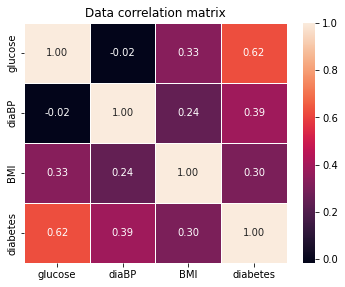

In [1546]:
# Check data correlation
corr_matrix(df_1_2_3,'Data correlation matrix')

##### Visualisation of relationship between the main diabetes indicators

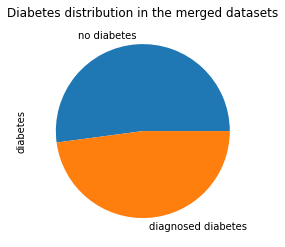

In [1547]:
# Diebetes distribution on pie plot
diabetes_list = ['no diabetes','diagnosed diabetes']
data_pie_plot_labels(df_1_2_3, 'diabetes', diabetes_list,'Diabetes distribution in the merged datasets')

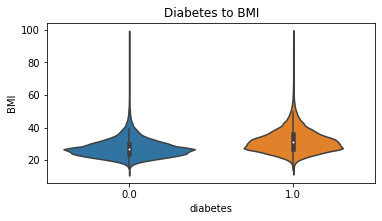

In [1548]:
# BMI distribution to the Diebetes in a violin plot
data_violinplot(df_1_2_3, 'diabetes', 'BMI', 'Diabetes to BMI')

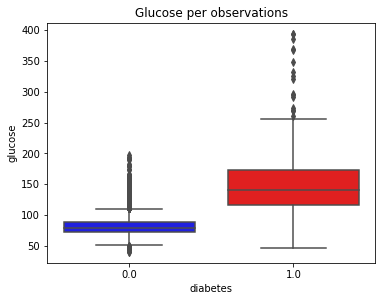

In [1549]:
# The distribution Glucose via boxplot
data_boxplot(df_1_2_3, 'glucose', 'diabetes', 'Glucose per observations')

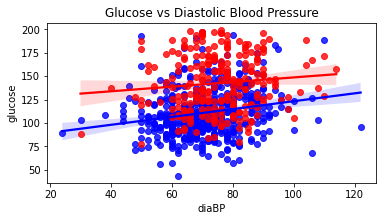

In [1550]:
#Correlation between the two most significant indicators: Glucose and diaBP
data_regplot(df_1_2_3, 'diaBP', 'glucose', 'diabetes', 'Glucose vs Diastolic Blood Pressure')

### Conclusion:
#### Three datasets with data on people with or without diabetes were provided for analysis. The data also included additional medical and behavioral information about the study population.
#### After preliminary processing and exploratory analysis, the datasets were merged.
#### The final analysis confirmed the significance of indicators such as elevated blood glucose levels after 2 hours and a history of elevated diastolic blood pressure on the likelihood of diagnosing diabetes. 
#### An elevated body mass index is also a significant, but not leading, indicator of the likelihood of being diagnosed with diabetes.